<a href="https://colab.research.google.com/github/rohitrnath/LLM-Training-Colab-Sync/blob/main/Qualcomm_AI_HUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qai-hub
!qai-hub configure --api_token QC_HUB_API_TOKEN

/usr/local/lib/python3.10/dist-packages/qai_hub/_cli.py:272: UserWarning: Overwriting configuration: /root/.qai_hub/client.ini (previous configuration saved to /root/.qai_hub/client.ini.bak)
  warnings.warn(
qai-hub configuration saved to /root/.qai_hub/client.ini
==================== /root/.qai_hub/client.ini ====================
[api]
api_token = 8ae918dfb98d073453cbc678ccf3becaabdb1d63
api_url = https://app.aihub.qualcomm.com
web_url = https://app.aihub.qualcomm.com
verbose = True




In [ ]:
import qai_hub as hub

# Compile a model to TensorFlow Lite
compile_job = hub.submit_compile_job(
    model="ylt_pln.onnx",
    device=hub.Device("Samsung Galaxy S23 Ultra"),
)
assert isinstance(compile_job, hub.CompileJob)



Uploading model: 100%|██████████| 31.3M/31.3M [00:01<00:00, 29.2MB/s]


Scheduled compile job (jqp4l93v5) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/jqp4l93v5/



In [ ]:
print(compile_job)

Job(job_id=jqp4l93v5, model_id=mjqy35o9m, device=Device(name='Samsung Galaxy S23 Ultra', os='13', attributes=['os:android', 'framework:tflite', 'framework:onnx', 'vendor:samsung', 'format:phone', 'framework:qnn', 'chipset:qualcomm-snapdragon-8gen2', 'chipset:sm8550']))


In [ ]:
print(compile_job2)

Job(job_id=jo5mnd8wp, model_id=mwn0xg19n, device=Device(name='Samsung Galaxy S23', os='13', attributes=['os:android', 'framework:tflite', 'framework:onnx', 'vendor:samsung', 'format:phone', 'framework:qnn', 'chipset:qualcomm-snapdragon-8gen2', 'chipset:sm8550']))


In [ ]:
# Compile a model to a QNN Model Library
compile_job2 = hub.submit_compile_job(
    model="ylt_pln.onnx",
    device=hub.Device("Samsung Galaxy S23"),
    options="--target_runtime qnn_lib_aarch64_android",
)
assert isinstance(compile_job, hub.CompileJob)

Uploading model: 100%|██████████| 31.3M/31.3M [00:01<00:00, 25.8MB/s]


Scheduled compile job (jo5mnd8wp) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/jo5mnd8wp/



In [ ]:
model0 = compile_job.get_target_model()
print(model0)

Model(model_id='m9m5dvy9n', name='job_jqp4l93v5_optimized_tflite')


In [ ]:
model = compile_job2.get_target_model()

In [ ]:
print(model)

Model(model_id='mjqy35oxm', name='job_jo5mnd8wp_optimized_so')


In [ ]:
os.makedirs(output_path, exist_ok=True)
for component_name, compile_job in compile_jobs.items():
    target_model: hub.Model = compile_job.get_target_model()  # type: ignore
    target_model.download(
        str(output_path / f"{model_name}_{component_name}.tflite")
    )

In [ ]:
pip install "qai_hub_models[openai_clip]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.8/967.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.5/324.5 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 459.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
!python -m qai_hub_models.models.openai_clip.demo

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
openai_clip requires repository https://github.com/openai/CLIP . Ok to clone? [Y/n] Y
Cloning https://github.com/openai/CLIP to /root/.qaihm/models/openai_clip/v1/openai_CLIP_git...
Done
100%|████████████████████████████████████████| 335M/335M [00:01<00:00, 178MiB/s]
Searching images by prompt: camping under the stars
	 Image with name: image1.jpg has a similarity score=16.09138298034668
	 Image with name: image2.jpg has a similarity score=18.69312286376953
	 Image with name: image3.jpg has a similarity score=34.05372619628906
Displaying the most relevant image
Displaying image
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882

In [ ]:
import qai_hub as hub

# Compile a model to a QNN Model Library
compile_job = hub.submit_compile_job(
    model="mobilenet_v2.pt",
    device=hub.Device("Samsung Galaxy S23"),
    options="--target_runtime qnn_lib_aarch64_android",
    input_specs=dict(image=(1, 3, 224, 224)),
)
assert isinstance(compile_job, hub.CompileJob)

In [ ]:
!python -m qai_hub_models.models.openai_clip.export --target-runtime qnn_lib_aarch64_android

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
usage: export.py [-h] [--device DEVICE] [--skip-profiling] [--skip-inferencing]
                 [--skip-downloading] [--skip-summary] [--output-dir OUTPUT_DIR]
                 [--target-runtime {tflite,qnn}] [--compile-options COMPILE_OPTIONS]
                 [--profile-options PROFILE_OPTIONS]
                 [--components {CLIPTextEncoder,CLIPImageEncoder} [{CLIPTextEncoder,CLIPImageEncoder} ...]]
export.py: error: argument --target-runtime: invalid choice: 'qnn_lib_aarch64_android' (choose from 'tflite', 'qnn')


In [ ]:
!python -m qai_hub_models.models.openai_clip.export --target_runtime qnn

Optimizing model CLIPTextEncoder to run on-device.
Uploading model: 100% 571M/571M [00:09<00:00, 65.2MB/s]
Scheduled compile job (j1p383m52) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/j1p383m52/

Optimizing model CLIPImageEncoder to run on-device.
Uploading model: 100% 571M/571M [00:09<00:00, 62.0MB/s]
Scheduled compile job (jwgom0158) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/jwgom0158/

Profiling model CLIPTextEncoder on a hosted device.
Waiting for compile job (j1p383m52) completion. Type Ctrl+C to stop waiting at any time.
    ✅ SUCCESS                          
Scheduled profiling job (j1pv4ozpx) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/j1pv4ozpx/

Profiling model CLIPImageEncoder on a hosted device.
Waiting for compile job (jwgom0158) completion. Type Ctrl+C to stop waiting at any time.
    ✅ SUCCESS                          
Scheduled profiling job (

### Fast SAM

In [ ]:
!pip install "qai-hub-models[fastsam_s]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.4/806.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.5/324.5 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.3/617.3 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━

  0%|          | 0.00/22.7M [00:00<?, ?B/s]

requirements: Ultralytics requirement ['git+https://github.com/openai/CLIP.git'] not found, attempting AutoUpdate...
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-txojqc3u
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 1.9 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=b4636437c437fd69672563d104d21d5350deab517183996dbe64aed60cfde9d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-p3mnspx0/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip

requirements: AutoUpdate success ✅ 12.5s, installed 1 package: ['git+https://github.com/openai/CLIP.git']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Saving  to /root/.qaihm/models/fastsam_s/v1/out

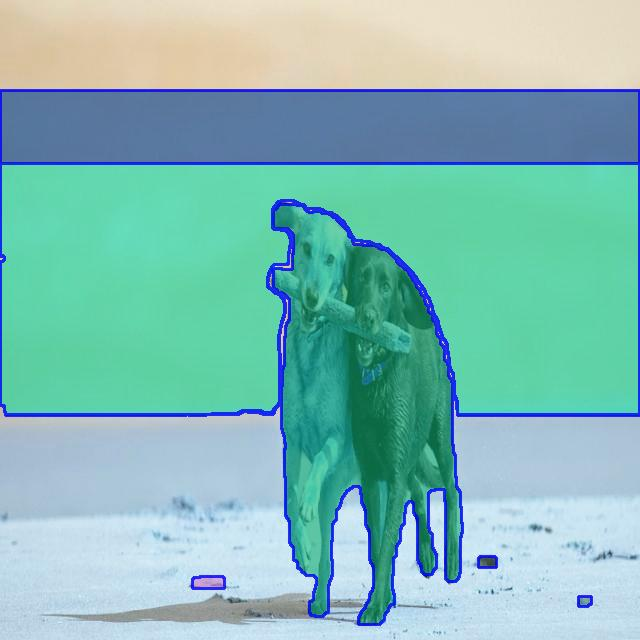

In [ ]:
%run -m qai_hub_models.models.fastsam_s.demo

In [ ]:
!python -m qai_hub_models.models.fastsam_s.export

Optimizing model fastsam_s to run on-device.
Uploading model: 100% 45.6M/45.6M [00:01<00:00, 35.5MB/s]
Scheduled compile job (j1p31zng2) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/j1p31zng2/

Profiling model fastsam_s on a hosted device.
Waiting for compile job (j1p31zng2) completion. Type Ctrl+C to stop waiting at any time.
    ✅ SUCCESS                          
Scheduled profiling job (jwgonlkp8) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/jwgonlkp8/

Running inference for fastsam_s on a hosted device with example inputs.
Uploading dataset: 100% 4.23M/4.23M [00:00<00:00, 7.53MB/s]
Scheduled inference job (j1pvrlr5x) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/j1pvrlr5x/

job_j1p31zng2_optimized_tflite_mwn0jv3m8.tflite: 100% 45.1M/45.1M [00:01<00:00, 42.9MB/s]
Waiting for profile job (jwgonlkp8) completion. Type Ctrl+C to stop waiting at any time.
    ✅ SUCCESS

### Llama Model

In [2]:
!pip install "qai_hub_models[llama_v2_7b_chat_quantized]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.3/401.3 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

In [10]:
!python -m qai_hub_models.models.llama_v2_7b_chat_quantized.demo

+-------------------------------------------------------------------------------------------------------------------------------+
| Recommended minimum memory of 40 GB memory (RAM + swap-space), found 12 GB.                                                   |
| You might see process killed error due to OOM during export/demo.                                                             |
|                                                                                                                               |
| Please increase your swap-space temporarily as a work-around. It might slow down export but allow you to export successfully. |
| You can refer to https://askubuntu.com/questions/178712/how-to-increase-swap-space for instructions                           |
| or run following commands:                                                                                                    |
|                                                                                         

In [11]:
!python -m qai_hub_models.models.llama_v2_7b_chat_quantized.export

+-------------------------------------------------------------------------------------------------------------------------------+
| Recommended minimum memory of 40 GB memory (RAM + swap-space), found 12 GB.                                                   |
| You might see process killed error due to OOM during export/demo.                                                             |
|                                                                                                                               |
| Please increase your swap-space temporarily as a work-around. It might slow down export but allow you to export successfully. |
| You can refer to https://askubuntu.com/questions/178712/how-to-increase-swap-space for instructions                           |
| or run following commands:                                                                                                    |
|                                                                                         

### Controlnet

In [ ]:
!pip install "qai_hub_models[controlnet_quantized]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


In [ ]:
!python -m qai_hub_models.models.controlnet_quantized.demo

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]

----------------------------------------------------------------------------------------------------
** Performing image generation on-device(Samsung Galaxy S23) with ControlNet - Stable Diffusion **

Prompt: a white bird on a colorful window
Image: /root/.qaihm/models/controlnet_quantized/v1/test_images/test_bird_image.png
Number of steps: 2
Guidance scale: 7.5
Seed: 0

Note: This reference demo uses significant amounts of memory and may take 5-10 minutes to run ** per step **.
----------------------------------------------------------------------------------------------------

-----------------------------------
Uploading model assets on QAI-Hub
-----------------------------------
Uploading model: 100% 155M/155M [00:02<00:00, 56.3MB/s]


### Custom Model Profiling in AI HUB

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2", torch_dtype="auto", trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2", trust_remote_code=True)

inputs = tokenizer('''def print_prime(n):
   """
   Print all primes between 1 and n
   """''', return_tensors="pt", return_attention_mask=False)

outputs = model.generate(**inputs, max_length=200)
text = tokenizer.batch_decode(outputs)[0]
print(text)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
from typing import Tuple
import torch
import qai_hub as hub
from qai_hub_models.models.yolov7 import Model as YOLOv7Model

# Load YOLOv7 in PyTorch
torch_model = YOLOv7Model.from_pretrained()
torch_model.eval()

# Trace the PyTorch model using one data point of provided sample inputs to
# torch tensor to trace the model.
example_input = [torch.tensor(data[0]) for name, data in torch_model.sample_inputs().items()]
pt_model = torch.jit.trace(torch_model, example_input)

# Select a device
device = hub.Device("Samsung Galaxy S23")

# Compile model for a specific device
compile_job = hub.submit_compile_job(
    model=pt_model,
    device=device,
    input_specs=torch_model.get_input_spec(),
)

# Get target model to run on a cloud hosted device
target_model = compile_job.get_target_model()

# Profile the previously compiled model on a cloud hosted device
profile_job = hub.submit_profile_job(
    model=target_model,
    device=device,
)

# Perform on-device inference on a cloud hosted device
input_data = torch_model.sample_inputs()
inference_job = hub.submit_inference_job(
    model=target_model,
    device=device,
    inputs=input_data,
)

# Returns the output as dict{name: numpy}
on_device_output = inference_job.download_output_data()